In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
working_directory=os.getcwd()
print(working_directory)

/Users/jiayiwang/Downloads


In [2]:
path=working_directory + '/glassdoor_jobs.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

There is no NaN, but maybe it replaced by -1.

In [7]:
df.shape

(956, 15)

In [8]:
df.drop(labels=['Unnamed: 0'], axis='columns',inplace=True)

In [9]:
df.shape

(956, 14)

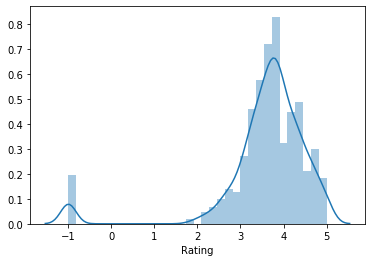

In [10]:
sns.distplot(df['Rating'])

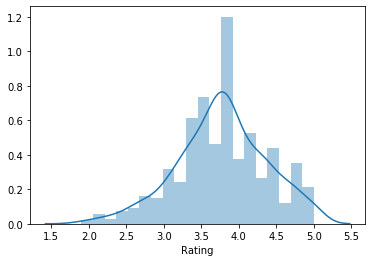

In [11]:
df['Rating']=df['Rating'].apply(lambda a: np.NaN if a==-1 else a)
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
sns.distplot(a=df['Rating'])

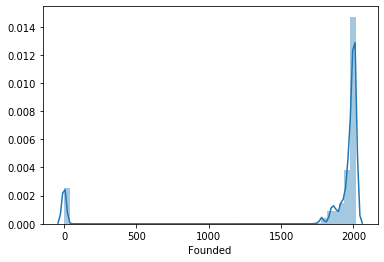

In [12]:
sns.distplot(df['Founded'])

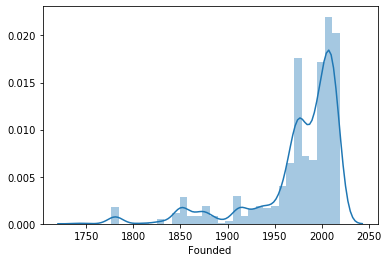

In [13]:
df['Founded']=df['Founded'].apply(lambda a: np.NaN if a==-1 else a)
df['Founded']=df['Founded'].fillna(df['Founded'].mean())
sns.distplot(a=df['Founded'])

In [14]:
df['Job Title'].value_counts()

Data Scientist                                                    178
Data Engineer                                                      68
Senior Data Scientist                                              42
Data Analyst                                                       18
Senior Data Engineer                                               17
                                                                 ... 
Real World Evidence (RWE) Scientist                                 1
Software Engineer Staff Scientist: Human Language Technologies      1
Research Scientist, Machine Learning Department                     1
Software Data Engineer - College                                    1
Data Analyst Chemist - Quality System Contractor                    1
Name: Job Title, Length: 328, dtype: int64

In [15]:
def title_total(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower() or 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'consult' in title.lower():
        return 'consultant'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['Job Title_new']=df['Job Title'].apply(title_total)
num=df['Job Title_new'].value_counts()

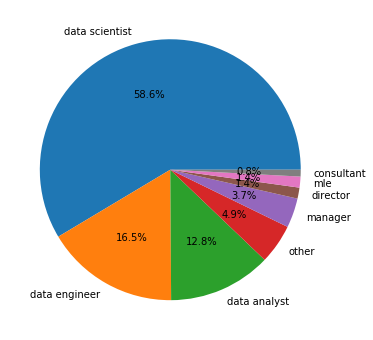

In [16]:
plt.figure(figsize=(10,6))
labels=num.keys()
plt.pie(x=num,autopct="%.1f%%", labels=num.keys())
plt.show()

In [17]:
df.drop(labels=['Job Title'], axis=1, inplace=True)

In [18]:
df['min_sal'] = df['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')

In [19]:
df['min_sal'] = df['min_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[0].str.replace('$','').str.replace('K','')

In [20]:
df['min_sal'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '',
       '109', '75', '34', '72', '93', '85', '77', '82', '115', '74', '68',
       '52', 'Employer Provided Salary:150', '158', '20', '41', '111',
       '84', '107', '49', '61', '88', '60', '96', '65', '139', '50', '99',
       '79', '57', '94', '37', '100', '55', '39', '31', '117', '40', '89',
       '200', '121', '76', '91', '95', '43', '29', '26', '112', '51',
       '113', 'Employer Provided Salary:120', '59', '44', '124', '131',
       '132', '17', '42', '116', '48', '105', '98',
       'Employer Provided Salary:200', '21', '114', '108', '90', '138',
       '190', '35', '18', '69', '66', '15', '33', '62', '127', '78', '45',
       '70', '130', '92', 'Employer Provided Salary:85', '36', '97', '24',
       '202', '32', '87', 'Employer Provided Salary:25',
       'Employer Provided Salary:100', '101', '125',
       'Employer Provided Salary:1

In [21]:
df['min_sal'] = df['min_sal'].str.replace('Employer Provided Salary:','')
df['min_sal'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '',
       '109', '75', '34', '72', '93', '85', '77', '82', '115', '74', '68',
       '52', '150', '158', '20', '41', '111', '84', '107', '49', '61',
       '88', '60', '96', '65', '139', '50', '99', '79', '57', '94', '37',
       '100', '55', '39', '31', '117', '40', '89', '200', '121', '76',
       '91', '95', '43', '29', '26', '112', '51', '113', '59', '44',
       '124', '131', '132', '17', '42', '116', '48', '105', '98', '21',
       '114', '108', '90', '138', '190', '35', '18', '69', '66', '15',
       '33', '62', '127', '78', '45', '70', '130', '92', '36', '97', '24',
       '202', '32', '87', '25', '101', '125', '10', '47', '176', '135',
       '129', '119', '27', '58', '136', '171'], dtype=object)

In [22]:
df['max_sal'] = df['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')
df['max_sal']

0       $53K-$91K ()
1      $63K-$112K ()
2       $80K-$90K ()
3       $56K-$97K ()
4      $86K-$143K ()
           ...      
951    $72K-$133K ()
952     $56K-$91K ()
953    $95K-$160K ()
954               -1
955    $61K-$126K ()
Name: max_sal, Length: 956, dtype: object

In [23]:
df['max_sal'] = df['max_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[1].str.replace('$','').str.replace('K','')

In [24]:
df['max_sal'] =df['max_sal'].str.replace('(Employer est.)','')

In [25]:
df['max_sal'] = df['max_sal'].str.split().str[0].str.replace('(','').str.replace(')','')

In [26]:
df['max_sal'].unique()

array(['91', '112', '90', '97', '143', '119', '93', '142', '84', '160',
       '201', '106', '172', '85', '144', '190', '137', '189', '175',
       '111', '130', '139', '105', '1', '177', '110', '124', '61', '120',
       '149', '140', '135', '132', '180', '138', '129', '113', '150',
       '211', '39', '117', '99', '114', '95', '176', '146', '109', '148',
       '72', '161', '81', '220', '102', '122', '157', '222', '118', '141',
       '154', '76', '100', '68', '107', '65', '62', '231', '134', '116',
       '123', '73', '164', '153', '275', '71', '193', '163', '101', '133',
       '125', '173', '159', '50', '55', '182', '223', '145', '115', '136',
       '167', '204', '78', '207', '174', '80', '24', '82', '185', '198',
       '250', '34', '206', '183', '166', '179', '127', '224', '25', '66',
       '86', '92', '103', '64', '16', '199', '126', '63', '194', '74',
       '208', '162', '209', '89', '202', '57', '200', '196', '171', '306',
       '59', '158', '28', '155', '98', '96', '210'

In [27]:
df['min_sal']=pd.to_numeric(df['min_sal'], errors='coerce')
type(df['min_sal'])

pandas.core.series.Series

In [28]:
df['min_sal'].isna().sum()

214

In [29]:
df['min_sal']=df['min_sal'].replace(np.nan, df['min_sal'].mean())

In [30]:
df['min_sal'].isna().sum()

0

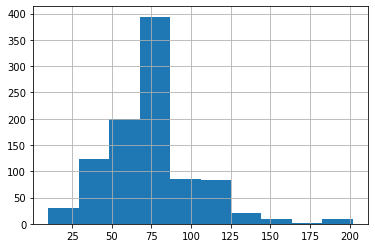

In [31]:
df['min_sal'].hist()

In [32]:
df['max_sal']=pd.to_numeric(df['max_sal'], errors='coerce')
type(df['max_sal'])

pandas.core.series.Series

In [33]:
df['max_sal'].isnull().sum()

0

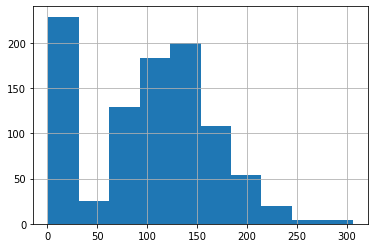

In [34]:
df['max_sal'].hist()
plt.show()

In [35]:
df['avg_sal']=(df['min_sal'] + df['max_sal'])/ 2

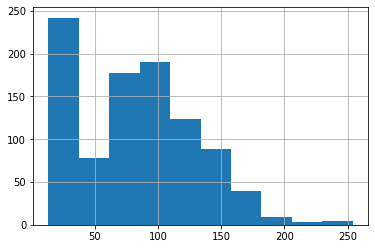

In [36]:
df['avg_sal'].hist()

In [37]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job Title_new,min_sal,max_sal,avg_sal
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,53.0,91,72.0
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,63.0,112,87.5
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,80.0,90,85.0
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,56.0,97,76.5
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,86.0,143,114.5


In [38]:
df.drop(labels=['min_sal'], axis='columns',inplace=True)

In [39]:
df.drop(labels=['max_sal'], axis='columns',inplace=True)

In [40]:
df.drop(labels=['Salary Estimate'], axis='columns',inplace=True)

In [41]:
df.head()

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job Title_new,avg_sal
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,72.0
1,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,87.5
2,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,85.0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,76.5
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,114.5


In [42]:
df['Company Name']=df['Company Name'].apply(lambda a: a.split('\n')[0])

Text(0.5, 0, 'Count')

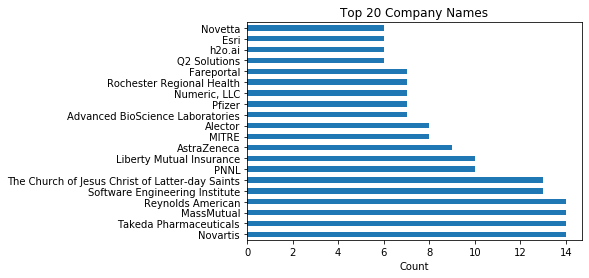

In [43]:
df['Company Name'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 20 Company Names')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

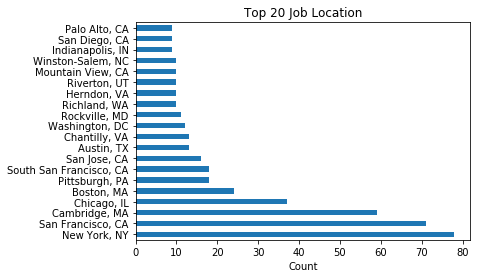

In [44]:
df['Location'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 20 Job Location')
plt.xlabel('Count')

In [45]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [46]:
def change(text):
    if '-1' in text.lower():
        return 'unknown'
    else:
        return text
    
df['Size']=df['Size'].apply(change)

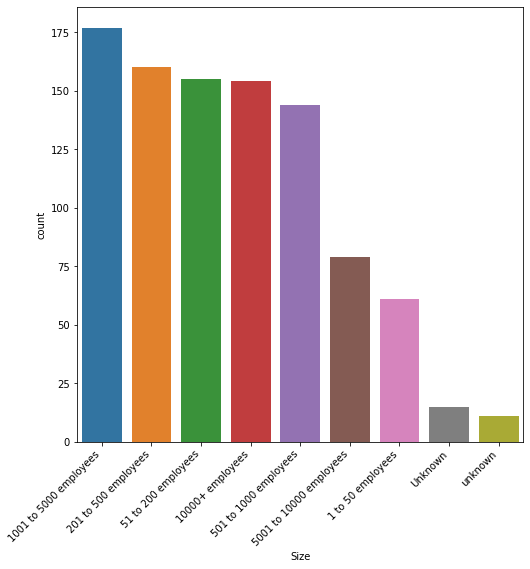

In [47]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p=g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

In [48]:
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
-1                                 11
Unknown                            11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [49]:
def ch(text):
    if '-1' in text.lower():
        return 'unknown'
    else:
        return text
    
df['Type of ownership']=df['Type of ownership'].apply(ch)

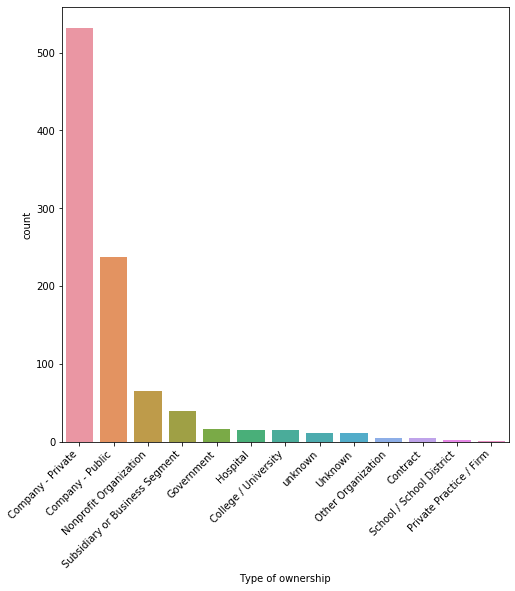

In [50]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p=g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

In [51]:
df['Industry'].value_counts()

Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
                                          ... 
Other Retail Stores                          1
Beauty & Personal Accessories Stores         1
Transportation Equipment Manufacturing       1
Trucking                                     1
Utilities                                    1
Name: Industry, Length: 63, dtype: int64

In [52]:
def cha(text):
    if '-1' in text.lower():
        return 'Others'
    else:
        return text
    
df['Industry']=df['Industry'].apply(cha)

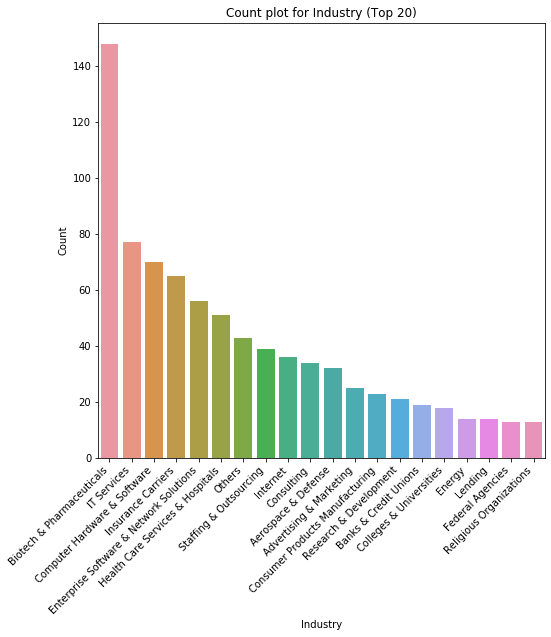

In [53]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts().head(20).index)
p=g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')

In [54]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [55]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

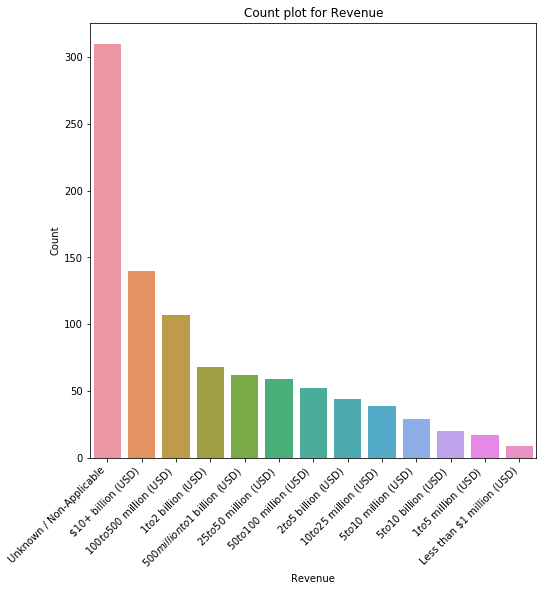

In [56]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [57]:
df['python_job']=df['Job Description'].apply(lambda x:1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

Text(0.5, 1.0, 'Python jobs percentage')

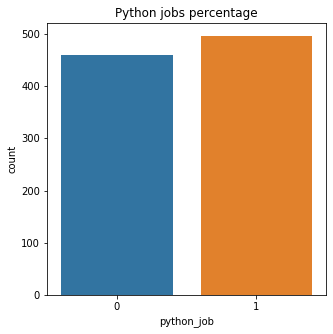

In [58]:
plt.figure(figsize=(5,5))
sns.countplot(x='python_job', data=df)
plt.title('Python jobs percentage')

Text(0.5, 1.0, 'Excel jobs percentage')

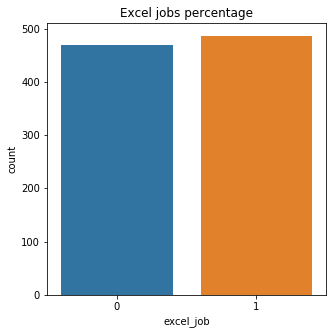

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='excel_job', data=df)
plt.title('Excel jobs percentage')

Text(0.5, 1.0, 'SQL jobs percentage')

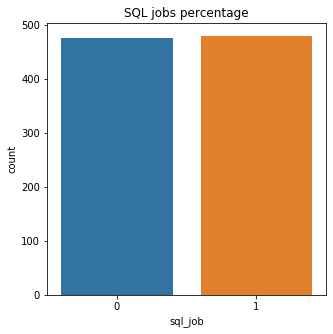

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='sql_job', data=df)
plt.title('SQL jobs percentage')

Text(0.5, 1.0, 'Tableau jobs percentage')

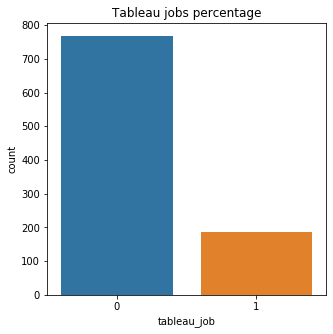

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(x='tableau_job', data=df)
plt.title('Tableau jobs percentage')